<a href="https://colab.research.google.com/github/vanyagoncharov/CourseMLResourse/blob/main/%D0%94%D0%95%D0%9C%D0%9E_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Решающие деревья



Решающее дерево состоит из вершин, в каждой из которой записан **предикат/правило**: то есть логическое выражение вида $[x_{ij} < t]$.

Процесс обучения дерева:
 - обучающая выборка разбивается на подгруппы согласно тестируемому правилу/предикату
 - на каждом шаге разбиения выборки выбирается наилучший предикат/правило исходя из **критерия информативности**


Запишем задачу формально: мы находимся в узле с множеством объектов $R_m$ и наша цель разбить множество на 2 подмножества: $R_l$ и $R_r$.
Оценивать качество разбиения мы будем следующим образом:
$$H(R_m) - \frac{|R_l|}{|R_m|}H(R_l) - \frac{|R_r|}{|R_m|}H(R_r) \to \max.$$

Нам необходимо найти такую функцию $H(x)$, которая будет оценивать различия и сходства объектов.


Официальная документация - https://scikit-learn.org/stable/modules/tree.html#tree-mathematical-formulation


Функция $H(x)$ зависит от задачи, которую мы решаем

**Регрессия**
1. MSE — дисперсия целевой переменной
$$H(R) = \frac{1}{|R|} \sum_{(x_i, y_i) \in R}{}(y_i - \hat{y})^2$$

2. MAE — отклонение от медианы
$$H(R) = \frac{1}{|R|} \sum_{(x_i, y_i) \in R}{}\frac{|y_i - MEDIAN(Y)|}{|R|}$$

**Классификация**

Обозначим $p_k$ долю объектов класса $k$ во множестве объектов $R$.
1. Энтропия
$$H(R) = -\sum_{k=1}^{K} p_k log(p_k)$$

2. Критерий Джини
$$H(R) = \sum_{k=1}^{K} p_k log(p_k)$$



Что выбрать? Линейные модели или решающие деревья



- Линейная модель --> данные хорошо линейно разделимы
- Решающие деревья --> данные плохо линейно разделимы

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [ ]:

%matplotlib inline
plt.rcParams["figure.figsize"] = (7, 5)

In [ ]:
# фиксируем для вопроизводимости
my_random_state = 12345

In [ ]:
# сгенерим данные
np.random.seed(my_random_state)
n = 100
X = np.zeros(shape=(n, 2))
# X

In [ ]:
X[:, 0] = np.linspace(-5, 5, n)
# X

In [ ]:
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=n)
# X

In [ ]:
y = (X[:, 1] > X[:, 0]).astype(int)
y

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

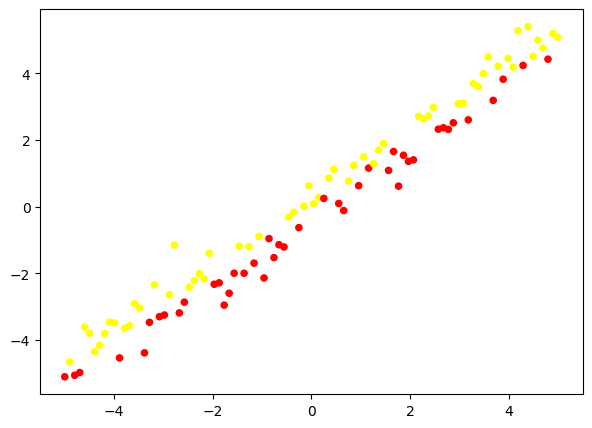

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=20, c=y, cmap="autumn")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=my_random_state)

lr = LogisticRegression(random_state=my_random_state)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Accuracy логистическая регрессии: {round(accuracy_score(y_pred_lr, y_test),2)}")

Accuracy логистическая регрессии: 0.9


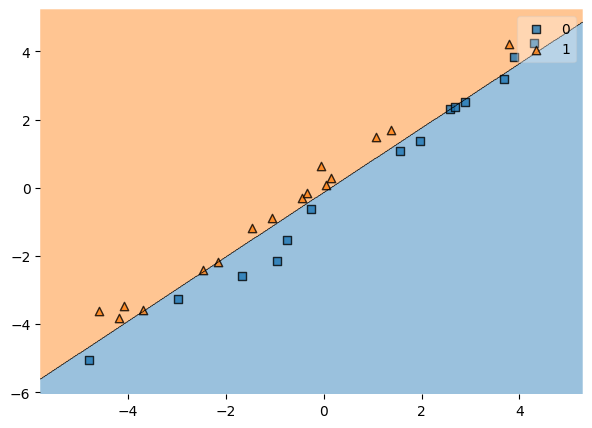

In [ ]:
plot_decision_regions(X_test, y_test, lr);

In [ ]:
dt = DecisionTreeClassifier(random_state=my_random_state)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Decision tree accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")

Decision tree accuracy: 0.70


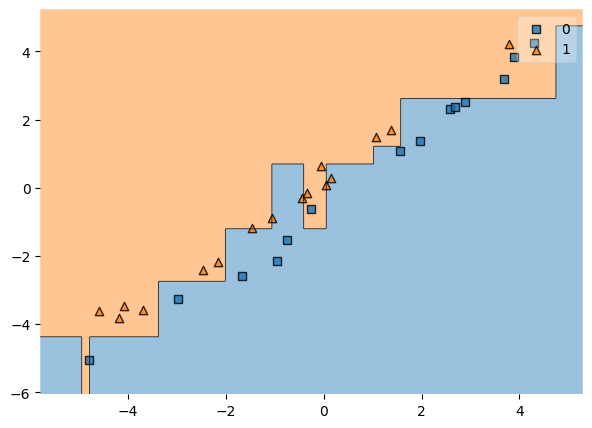

In [ ]:
plot_decision_regions(X_test, y_test, dt);

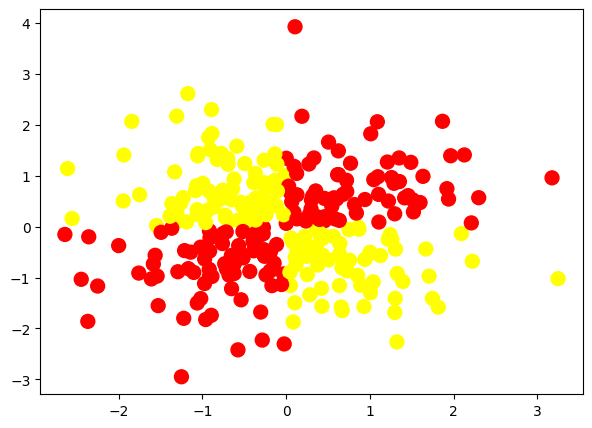

In [ ]:
np.random.seed(my_random_state)
n = 300
X = np.random.randn(n, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="autumn");

Accuracy для логистичская регрессии: 0.44


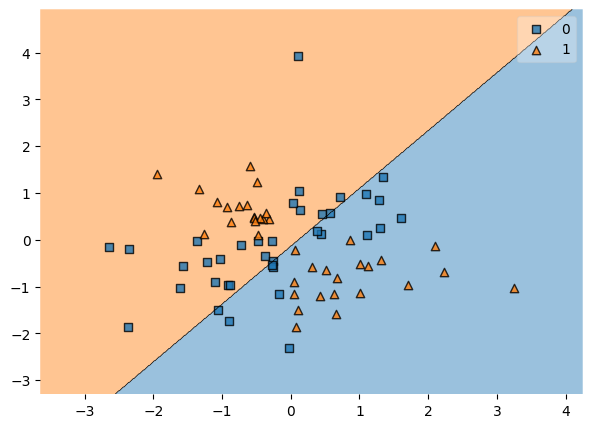

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=my_random_state
)

lr = LogisticRegression(random_state=my_random_state)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f"Accuracy для логистичская регрессии: {round(accuracy_score(y_pred_lr, y_test),2)}")

plot_decision_regions(X_test, y_test, lr);

Linear model accuracy: 0.96


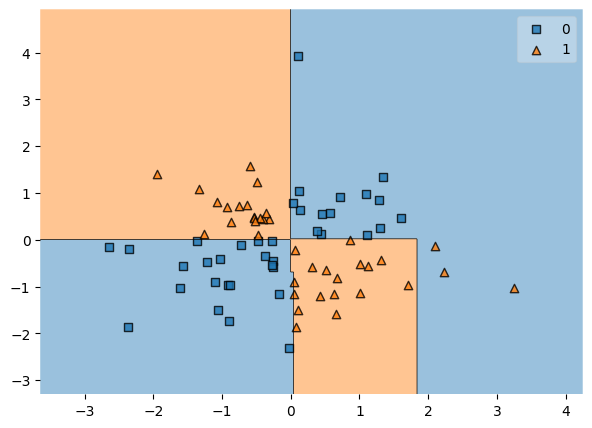

In [ ]:
dt = DecisionTreeClassifier(random_state=my_random_state)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Linear model accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")

plot_decision_regions(X_test, y_test, dt);

# А может ли дерево переобучиться?

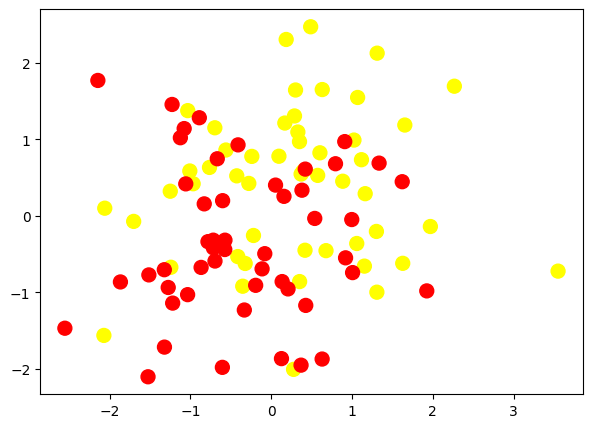

In [ ]:
np.random.seed(my_random_state)
n = 100
X = np.random.normal(size=(n, 2))
X[:50, :] += 0.3
X[50:, :] -= 0.3
y = np.array([1] * 50 + [0] * 50)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="autumn");

In [ ]:
# ?DecisionTreeClassifier

Протестируем следующие гиперапараметры:

- `max_depth`: максимальная глубина дерева
- `min_samples_leaf`: минимальное число объектов в вершине дерева, необходимое для того, чтобы она стала листовой

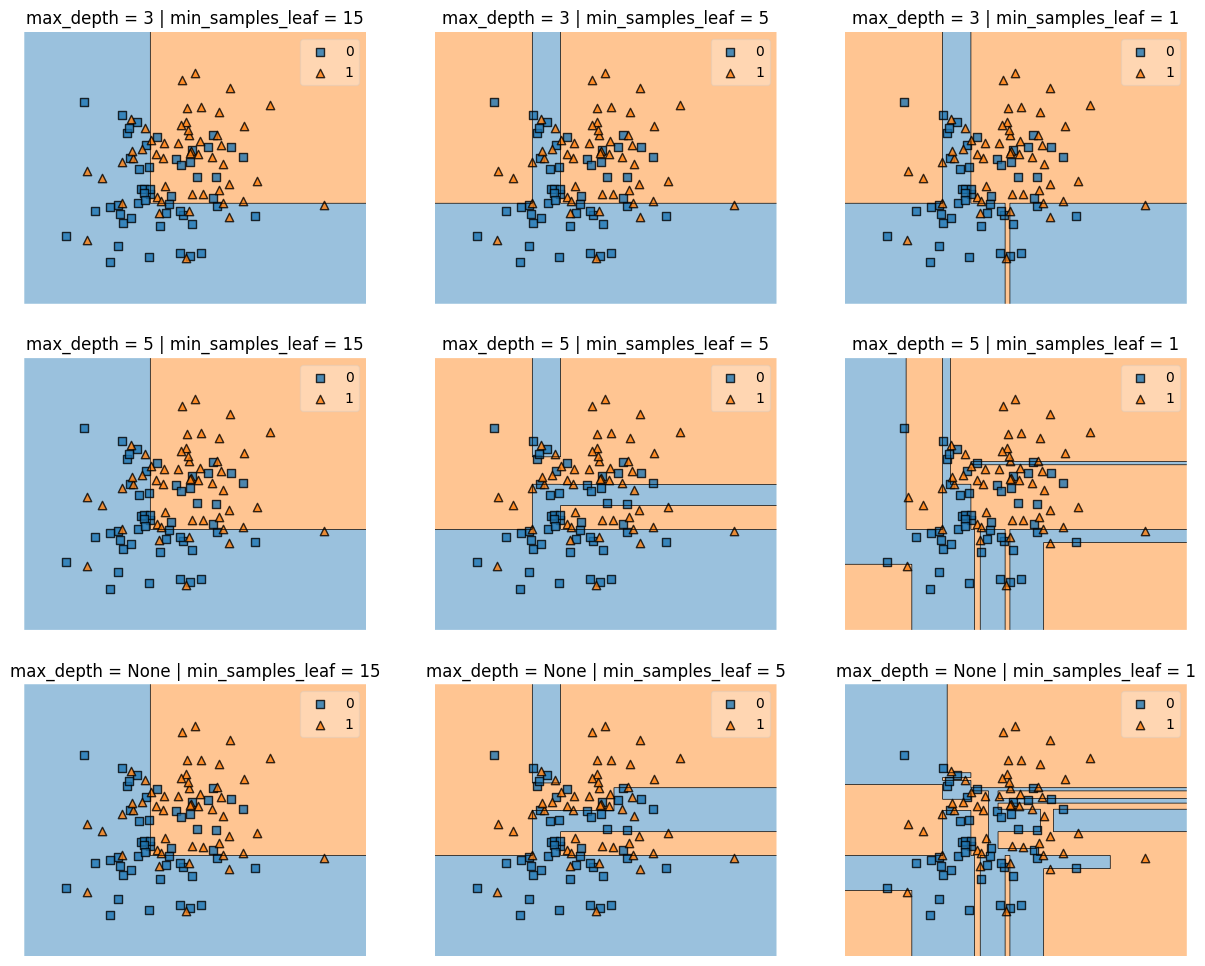

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, max_depth in enumerate([3, 5, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        dt = DecisionTreeClassifier(
            max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=my_random_state
        )
        dt.fit(X, y)
        ax[i][j].set_title(
            "max_depth = {} | min_samples_leaf = {}".format(max_depth, min_samples_leaf)
        )
        ax[i][j].axis("off")
        plot_decision_regions(X, y, dt, ax=ax[i][j])

plt.show()

На любой выборке  можно получить нулевую ошибку с помощью максимально переобученного дерева:

Accuracy для дерева решений: 1.0


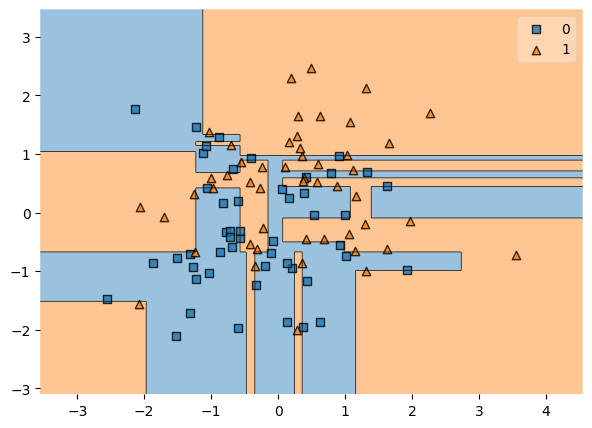

In [ ]:
dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, random_state=my_random_state)
dt.fit(X, y)

print(f"Accuracy для дерева решений: {round(accuracy_score(y, dt.predict(X)),2)}")

plot_decision_regions(X, y, dt);

Неустойчивость решающих деревьев

Посмотрим, как будет меняться структура дерева, если брать для обучения разные 90%-ые подвыборки исходной выборки.

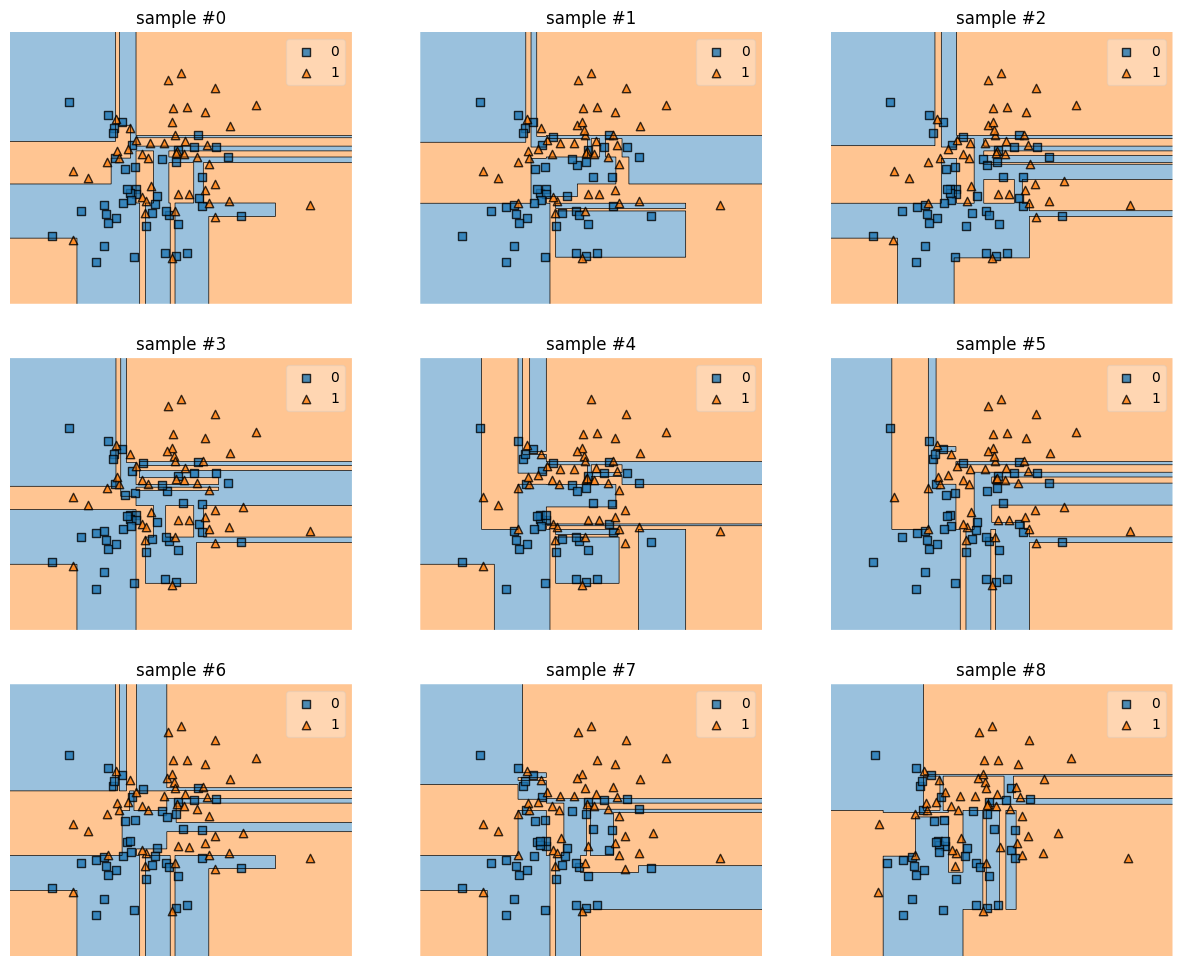

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        seed_idx = 3 * i + j
        np.random.seed(seed_idx)
        dt = DecisionTreeClassifier(random_state=my_random_state)
        idx_part = np.random.choice(len(X), replace=False, size=int(0.9 * len(X)))
        X_part, y_part = X[idx_part, :], y[idx_part]
        dt.fit(X_part, y_part)
        ax[i][j].set_title("sample #{}".format(seed_idx))
        ax[i][j].axis("off")
        plot_decision_regions(X_part, y_part, dt, ax=ax[i][j])

plt.show()

# Решение практической задачи при помощи решающих деревьев

In [ ]:
# Загрузка датасета Вин
wine = load_wine()
# X, y = wine.data, wine.target

X = pd.DataFrame(data=wine.data, columns=wine.feature_names)
y = wine.target
print(f"X shape: {X.shape}, Y shape: {y.shape}")
X.head()

X shape: (178, 13), Y shape: (178,)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


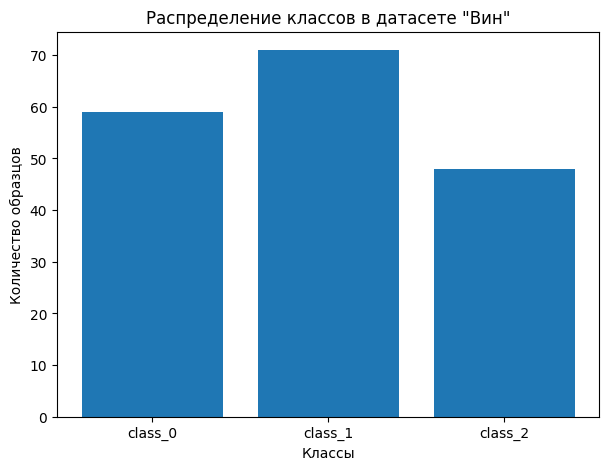

In [ ]:
# Посчитаем количество образцов для каждого класса
unique_classes, counts = np.unique(y, return_counts=True)

# Отобразим бар-плот
plt.bar(unique_classes, counts, tick_label=wine.target_names)
plt.xlabel('Классы')
plt.ylabel('Количество образцов')
plt.title('Распределение классов в датасете "Вин"')
plt.show()

Описание признаков (характеристик):

- Alcohol (Алкоголь): содержание алкоголя в вине (% по объему)
- Malic Acid (Яблочная кислота): содержание яблочной кислоты в вине (г/л)
- Ash (Зольность): содержание минералов, представленное зольностью (% по массе)
- Alcalinity of Ash (Щелочность золы): общая щелочность золы (г/л)
- Magnesium (Магний): содержание магния в вине (мг/л)
Total Phenols (Общие фенолы): общее содержание фенолов в вине (г/л)
- Flavanoids (Флавоноиды): содержание флавоноидов в вине (г/л)
- Nonflavanoid Phenols (Нефлавоноидные фенолы): содержание нефлавоноидных фенолов в вине (г/л)
- Proanthocyanins (Проантоцианидины): содержание проантоцианидинов в вине (г/л)
- Color Intensity (Интенсивность цвета): интенсивность цвета виноградного сока (от 1 до 10)
- Hue (Оттенок): оттенок вина, измеренный в градусах от 0 до 360
- OD280/OD315 of diluted wines (OD280/OD315 разбавленных вин): соотношение оптической плотности разбавленных вин при длине волны 280/315 нм
- Proline (Пролин): содержание пролина в вине (мг/л)

**Целевая переменная (классы):**

- Class_0: сорт 1
- Class_1: сорт 2
- Class_2: сорт 3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=my_random_state
)

dt_classifier = DecisionTreeClassifier(max_depth=None, random_state=my_random_state)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=12345)

In [ ]:
# Получение предсказанных меток классов на тестовой выборке
y_pred_test = dt_classifier.predict(X_test)
y_pred_train = dt_classifier.predict(X_train)
# Вычисление точности
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train, accuracy_test

(1.0, 0.9444444444444444)

In [ ]:

text_representation = export_text(dt_classifier)
print(text_representation)

|--- feature_12 <= 987.50
|   |--- feature_6 <= 1.24
|   |   |--- feature_10 <= 0.93
|   |   |   |--- class: 2
|   |   |--- feature_10 >  0.93
|   |   |   |--- class: 1
|   |--- feature_6 >  1.24
|   |   |--- feature_12 <= 744.00
|   |   |   |--- feature_11 <= 1.99
|   |   |   |   |--- class: 2
|   |   |   |--- feature_11 >  1.99
|   |   |   |   |--- feature_12 <= 679.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_12 >  679.00
|   |   |   |   |   |--- feature_9 <= 4.13
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_9 >  4.13
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_12 >  744.00
|   |   |   |--- feature_9 <= 3.46
|   |   |   |   |--- class: 1
|   |   |   |--- feature_9 >  3.46
|   |   |   |   |--- class: 0
|--- feature_12 >  987.50
|   |--- class: 0



In [ ]:
# Визуализация дерева решений с помощью Graphviz
dot_data = export_graphviz(dt_classifier, out_file=None,
                           feature_names=wine.feature_names,
                           class_names=wine.target_names,
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("wine_tree")  # Сохраняем дерево в файл "wine_tree.pdf"
graph.view()  # Открываем дерево во внешнем просмотрщике (например, Graphviz или pdf-reader)


'wine_tree.pdf'

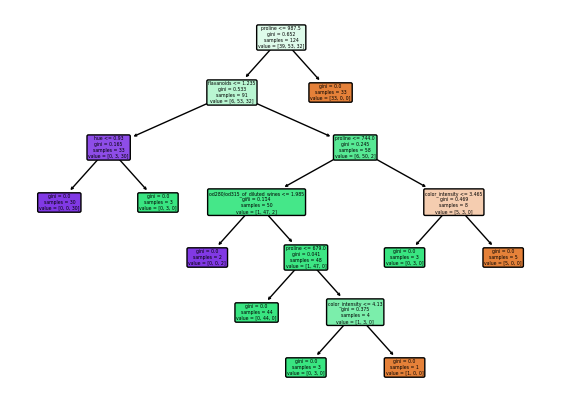

In [ ]:
# второй способ отрисовать деревья с помощью plot_tree
plot_tree(dt_classifier, feature_names=X.columns, filled=True, rounded=True)
plt.show()